In [1]:
import pandas as pd
import numpy as np
#text preprocessing
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from gensim.models import LdaSeqModel
from gensim.models import LdaModel,LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
PYTHONHASHSEED=0 #Disable randomization

In [2]:
df = pd.read_csv("tweets&logreturns.csv", index_col = 0)
req = df.loc[:,['cleaned_text','created_at']]
req = req.dropna()
req.head()

,cleaned_text,created_at
source,,
Twitter for iPhone,regardless youre pull think agree joe rogan wo...,2020-09-29 22:51:43
Twitter for iPhone,rig election,2020-09-29 22:37:44
Twitter for iPhone,volunteer trump election poll watcher sign tod...,2020-09-29 22:30:39
Twitter for iPhone,epa one trillion tree initiative build preside...,2020-09-29 22:26:18
Twitter for iPhone,joe biden could not name single law enforcemen...,2020-09-29 22:15:30


In [3]:
#See time slice quantity
print(df.loc[df['created_at']>='2020-01-01'].shape)
print(df.loc[(df['created_at']<'2020-01-01') & (df['created_at']>='2019-01-01')].shape)
print(df.loc[(df['created_at']<'2019-01-01') & (df['created_at']>='2018-01-01')].shape)
print(df.loc[(df['created_at']<'2018-01-01') & (df['created_at']>='2017-01-01')].shape)
print(df.loc[(df['created_at']<'2017-01-01') & (df['created_at']>='2016-01-01')].shape)

(9181, 21)
(7835, 21)
(3572, 21)
(2602, 21)
(4223, 21)


In [4]:
#Split df by time
df_20 = req.loc[req['created_at']>='2020-01-01'].reset_index()
df_19 = req.loc[(req['created_at']<'2020-01-01') & (req['created_at']>='2019-01-01')].reset_index()
df_18 = req.loc[(req['created_at']<'2019-01-01') & (req['created_at']>='2018-01-01')].reset_index()
df_17 = req.loc[(req['created_at']<'2018-01-01') & (req['created_at']>='2017-01-01')].reset_index()
df_16 = req.loc[(req['created_at']<'2017-01-01')].reset_index()

#Put into list for for loop
df_all = [df_16,df_17,df_18,df_19,df_20]

# Get optimal coherence score per time split

In [ ]:
'''
#Just long loop
years = 2016
coherence_test = []
for year in df_all:

    # Tokenize the documents.
    from nltk.tokenize import RegexpTokenizer
    docs = year.cleaned_text
    # Split the documents into tokens.
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 1] for doc in docs]

    #Remove stopwords
    stop = list(stopwords.words('english'))
    docs = [[token for token in doc if token not in stop] for doc in docs]

    # Lemmatize the documents.
    from nltk.stem.wordnet import WordNetLemmatizer

    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

    from gensim.models import Phrases

    # Add bigrams and trigrams to docs (only ones that appear 10 times or more).
    bigram = Phrases(docs, min_count=10)
    for idx in range(len(docs)):
        for token in bigram[docs[idx]]:
            if '_' in token:
                # Token is a bigram, add to document.
                docs[idx].append(token)

    # Remove rare and common tokens.
    from gensim.corpora import Dictionary

    # Create a dictionary representation of the documents.
    dictionary = Dictionary(docs)

    # Filter out words that occur less than 20 documents, or more than 50% of the documents.
    dictionary.filter_extremes(no_below=10, no_above=0.5)

    # Bag-of-words representation of the documents.
    corpus = [dictionary.doc2bow(doc) for doc in docs]
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    # Make a index to word dictionary.
    temp = dictionary[0]  # This is only to "load" the dictionary.
    id2word = dictionary.id2token

    
    # Train LDA model.
    from gensim.models import LdaModel

    # Set training parameters.
    chunksize = 199
    passes = 20
    iterations = 400
    eval_every = None  # Don't evaluate model perplexity, takes too much time.

    val = []
    for i in np.arange(5,81,5):
        model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=i,
        passes=passes,
        eval_every=eval_every
        )
 
        cm = CoherenceModel(model, corpus=corpus, texts = docs,dictionary=dictionary,coherence='c_v')
        score = cm.get_coherence()
        print(str('Year: %d, topics: %d, coherence score: %.3f'%(years,i,score)))
        val.append([years,i,score])
    coherence_test.append(val)
    years = years + 1
'''

In [131]:
temp = []
for i in coherence_test:
    for j in i:
        temp.append(j)
temp2 = pd.DataFrame(temp)
temp2.columns=["Year","Topics","score"]
#temp2.to_csv("coherence_scores.csv",index=False)

In [6]:
temp2 = pd.read_csv("coherence_scores.csv")

In [7]:
lamb = lambda x: x - x.shift(1)
temp2['marginal'] = temp2.groupby('Year').score.apply(lamb)
temp2.fillna(0,inplace=True)
temp2

,Year,Topics,score,marginal
0,2016,5,0.368127,0.000000
1,2016,10,0.411682,0.043554
2,2016,15,0.430524,0.018843
3,2016,20,0.471881,0.041357
4,2016,25,0.473081,0.001200
...,...,...,...,...
75,2020,60,0.534051,0.004037
76,2020,65,0.550515,0.016464
77,2020,70,0.557009,0.006493
78,2020,75,0.564973,0.007964


Year
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

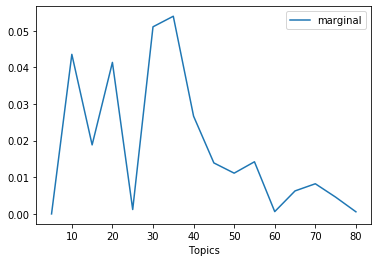

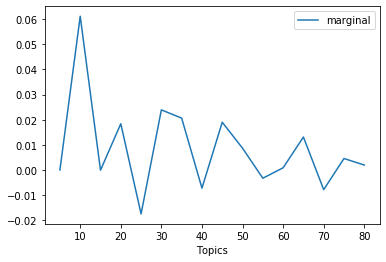

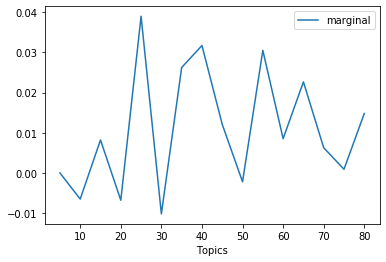

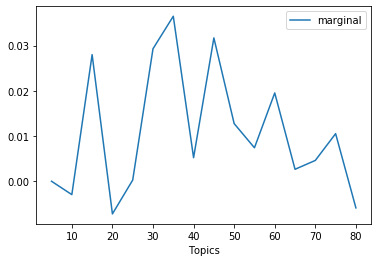

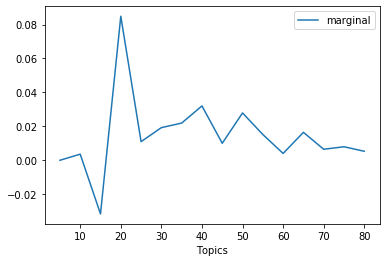

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
temp2.groupby('Year').plot(x='Topics',y='marginal')


From above, optimal where marginal last increased >= 0.2 is:<br>
2016: 40 <br>
2017: 45<br>
2018: 65<br>
2019: 60<br>
2020: 50<br>

Average == 52 topics

# Get optimal num of topics without time split

In [29]:
'''
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer
docs = df.cleaned_text.dropna()
# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

#Remove stopwords
stop = list(stopwords.words('english'))
docs = [[token for token in doc if token not in stop] for doc in docs]

# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(docs, min_count=10)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

    
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
chunksize = 199
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

    
val2 = []
for i in np.arange(5,81,5):
    model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=i,
    passes=passes,
    eval_every=eval_every,
    random_state=4222
    )
        
        
    from gensim.models.coherencemodel import CoherenceModel
    cm = CoherenceModel(model, corpus=corpus, texts = docs,dictionary=dictionary,coherence='c_v')
    score = cm.get_coherence()
    print(str('topics: %d, coherence score: %.3f'%(i,score)))
    val2.append([i,score])
'''

Number of unique tokens: 4058
Number of documents: 26229
topics: 5, coherence score: 0.259
topics: 10, coherence score: 0.313
topics: 15, coherence score: 0.316
topics: 20, coherence score: 0.305
topics: 25, coherence score: 0.322
topics: 30, coherence score: 0.346
topics: 35, coherence score: 0.396
topics: 40, coherence score: 0.420
topics: 45, coherence score: 0.446
topics: 50, coherence score: 0.477


KeyboardInterrupt: 

In [14]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer
docs = df.cleaned_text.dropna()
# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

#Remove stopwords
stop = list(stopwords.words('english'))
docs = [[token for token in doc if token not in stop] for doc in docs]

# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(docs, min_count=10)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 10 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

Number of unique tokens: 4058
Number of documents: 26229


In [31]:
lis = []
#keeping num of topics fixed, gridsearch
decay = [0.5,0.7,0.9]
passes = [100,200,300]
chunksize=[300,600,900]

for d in decay:
    for p in passes:
        for c in chunksize:
            model = LdaModel(
                corpus=corpus,
                id2word=id2word,
                chunksize=c,
                alpha='auto',
                eta='auto',
                decay=d,
                iterations=500,
                num_topics=10,
                passes=p,
                eval_every=None,
                random_state = 4222)
            cm = CoherenceModel(model, corpus=corpus, texts = docs,dictionary=dictionary,coherence='c_v')
            score = cm.get_coherence()
            lis.append([d,p,c,score])
            print(str('decay: %.2f, passes %d, chunksize: %d, coherence score: %.3f'%(d,p,c,score)))

decay: 0.50, passes 100, chunksize: 300, coherence score: 0.307
decay: 0.50, passes 100, chunksize: 600, coherence score: 0.350
decay: 0.50, passes 100, chunksize: 900, coherence score: 0.347
decay: 0.50, passes 200, chunksize: 300, coherence score: 0.318
decay: 0.50, passes 200, chunksize: 600, coherence score: 0.347
decay: 0.50, passes 200, chunksize: 900, coherence score: 0.353
decay: 0.50, passes 300, chunksize: 300, coherence score: 0.320
decay: 0.50, passes 300, chunksize: 600, coherence score: 0.353
decay: 0.50, passes 300, chunksize: 900, coherence score: 0.351
decay: 0.70, passes 100, chunksize: 300, coherence score: 0.336
decay: 0.70, passes 100, chunksize: 600, coherence score: 0.375
decay: 0.70, passes 100, chunksize: 900, coherence score: 0.364
decay: 0.70, passes 200, chunksize: 300, coherence score: 0.342
decay: 0.70, passes 200, chunksize: 600, coherence score: 0.373
decay: 0.70, passes 200, chunksize: 900, coherence score: 0.363
decay: 0.70, passes 300, chunksize: 300,

Best is decay: 0.90, passes 300, chunksize: 900, coherence score: 0.387

In [32]:
temp = pd.DataFrame(lis)
temp.columns = ['decay','passes','chunksize','coherence score']
temp.to_csv("list of optimal for 10 topics2.csv",index=False)

In [46]:
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=900,
    alpha='auto',
    eta='auto',
    decay=0.9,
    iterations=500,
    num_topics=10,
    passes=300,
    eval_every=None,
    random_state = 4222)
cm = CoherenceModel(model, corpus=corpus, texts = docs,dictionary=dictionary,coherence='c_v')
score = cm.get_coherence()
score

0.3871525384510754

In [16]:
import os
#filepath = os.getcwd() + "\\Coherence model"
#model.save(filepath+"\\model")

In [30]:
#load model
model = LdaModel.load(filepath+"\\model")

In [33]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      32.420952   8.115230       1        1  24.523883
6       0.648955  71.707100       2        1  15.818526
1      71.019684   9.971006       3        1  15.488021
2       3.785981  33.185135       4        1   8.409924
8     -42.666500  -9.222070       5        1   6.416469
4      -3.621689 -43.526516       6        1   6.205677
0      -3.632402  -4.171708       7        1   6.047855
3     -36.584400  35.804413       8        1   5.793327
7      44.391380  50.615383       9        1   5.758852
9      40.235809 -31.591665      10        1   5.537466, topic_info=           Term         Freq        Total Category  logprob  loglift
118       great  4170.000000  4170.000000  Default  30.0000  30.0000
42          amp  3500.000000  3500.000000  Default  29.0000  29.0000
19        trump  2995.000000  2995.000000  Default  28.0000  28.0000
26    president  2720.000000  2720.000000  Default  27.0000  27.0000
134       thank  2367.000000  2367.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
867        cost   137.173736   138.067138  Topic10  -4.8966   2.8871
847       shoot   136.836291   137.729681  Topic10  -4.8991   2.8871
1026       wait   135.365317   136.258710  Topic10  -4.9099   2.8871
1213       safe   220.351862   225.952651  Topic10  -4.4227   2.8685
1067       high   153.263235   295.979891  Topic10  -4.7857   2.2355

[352 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1691      6  0.997211             act
1477      6  0.995959              ad
73        8  0.998767  administration
972       8  0.995163          agenda
1804     10  0.997688          almost
...     ...       ...             ...
10        1  0.999336           would
54        1  0.999002            year
660       4  0.996924       yesterday
198       6  0.996892            york
2177      6  0.992818            zero

[342 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 2, 3, 9, 5, 1, 4, 8, 10])